# Clustering

#### Machine Learning with Python - Notebook #3

Content:
- K-Means Clustering
- Hierarchical Clustering
- Density Based Clustering (DBSCAN)




**Import Libraries**

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


**Data Extraction**

In [3]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv')
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


**Data Preparations**

In [4]:
from sklearn.preprocessing import StandardScaler

data = data.drop('Address', axis = 1)

X = data.values[:,1:]
X = np.nan_to_num(X)
ds = StandardScaler().fit_transform(X)

##**K-Means Clustering**

**Model Execution, Cluster Label Assignment**

In [5]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


k = 3
model = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
model.fit(X)

labels = model.labels_
data['Cluster'] = labels

**Insights, Distribution**

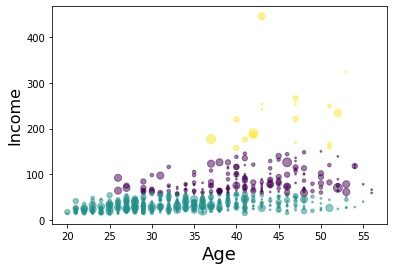

In [6]:
area = np.pi * (X[:, 1])**2  

plt.scatter(X[:, 0], X[:, 3], s = area, c = labels.astype(float), alpha = 0.5)
plt.xlabel('Age', fontsize = 18)
plt.ylabel('Income', fontsize = 16)
plt.show()

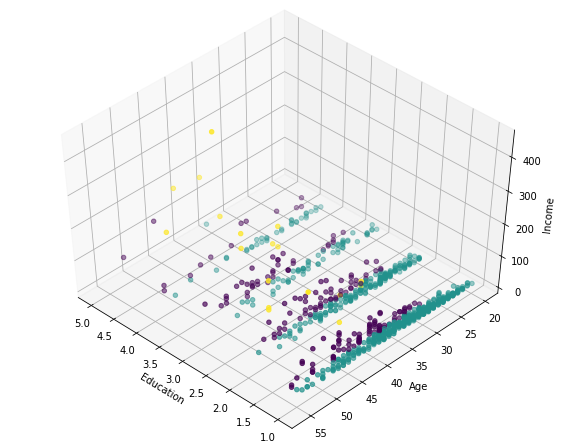

In [7]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(float))


##**Hierarchical Clustering - Agglomerative**

Agglomerative Clustering is a bottom-up approach, which means we start from the currently given groups, and build up to the parents from the child.

**Data Extraction**

In [21]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv")
data.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


**Cleaning Data, Normalization**

In [22]:
data[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = data[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors = 'coerce')
data = data.dropna()
data = data.reset_index(drop = True)

featureset = data[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

from sklearn.preprocessing import MinMaxScaler

x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)

data.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


**Clustering**

The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The ***linkage*** criteria determines the metric used for the merge strategy:

*   ***Ward*** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
*   ***Maximum*** or ***Complete*** linkage minimizes the maximum distance between observations of pairs of clusters.
*   ***Average*** linkage minimizes the average of the distances between all observations of pairs of clusters.

In [23]:
from sklearn.metrics.pairwise import euclidean_distances

dist_matrix = euclidean_distances(feature_mtx, feature_mtx) 

from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

data['cluster'] = agglom.labels_
data.head()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,3
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


Text(0, 0.5, 'mpg')

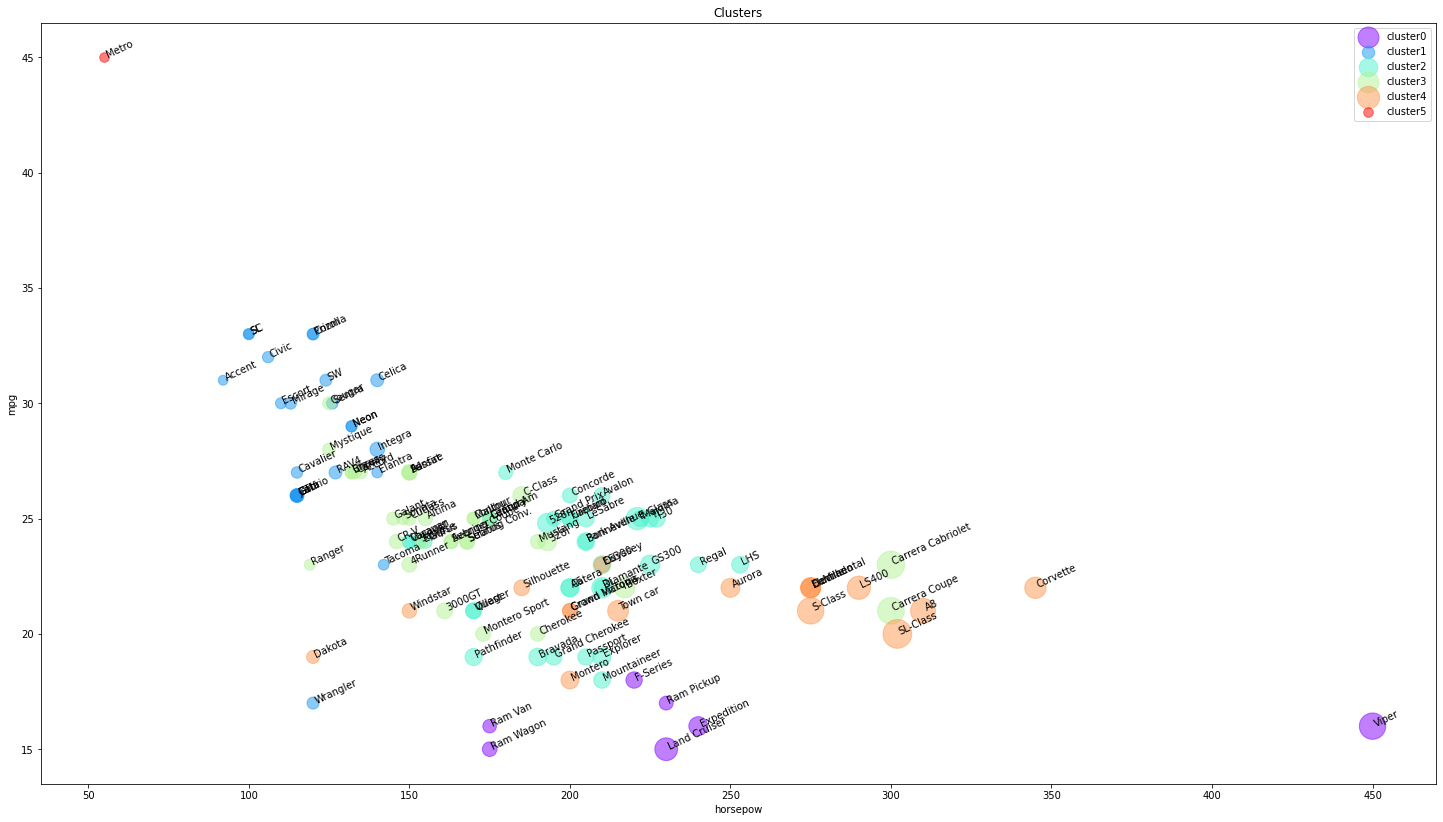

In [25]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(25,14))

for color, label in zip(colors, cluster_labels):
    subset = data[data.cluster == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

<ipython-input-28-6f77d2d0c9fe>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = data.groupby(['cluster','type'])['horsepow','engine_s','mpg','price'].mean()


Text(0, 0.5, 'mpg')

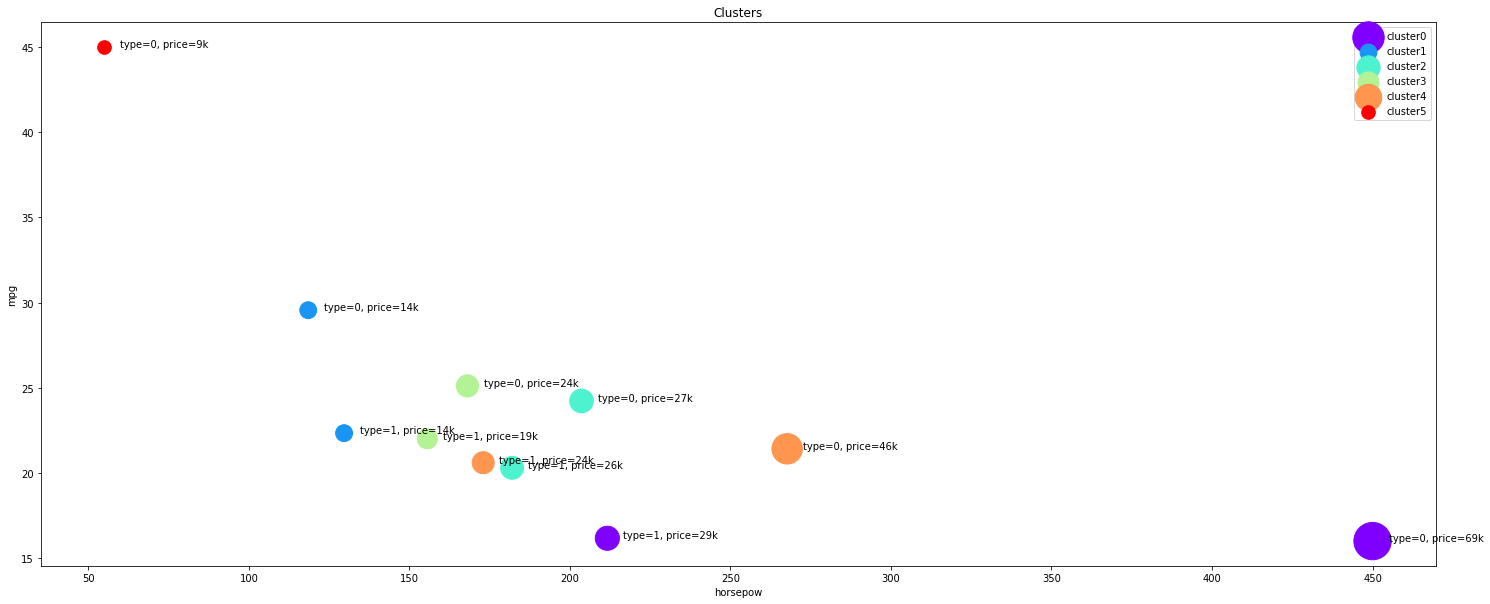

In [28]:
agg_cars = data.groupby(['cluster','type'])['horsepow','engine_s','mpg','price'].mean()


plt.figure(figsize=(25,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

**Evolutionary - Dendogram**

Hierarchical clustering does not require a pre-specified number of clusters. However, in some applications we want a partition of disjoint clusters just as in flat clustering.

<ipython-input-29-51bff97d7b00>:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


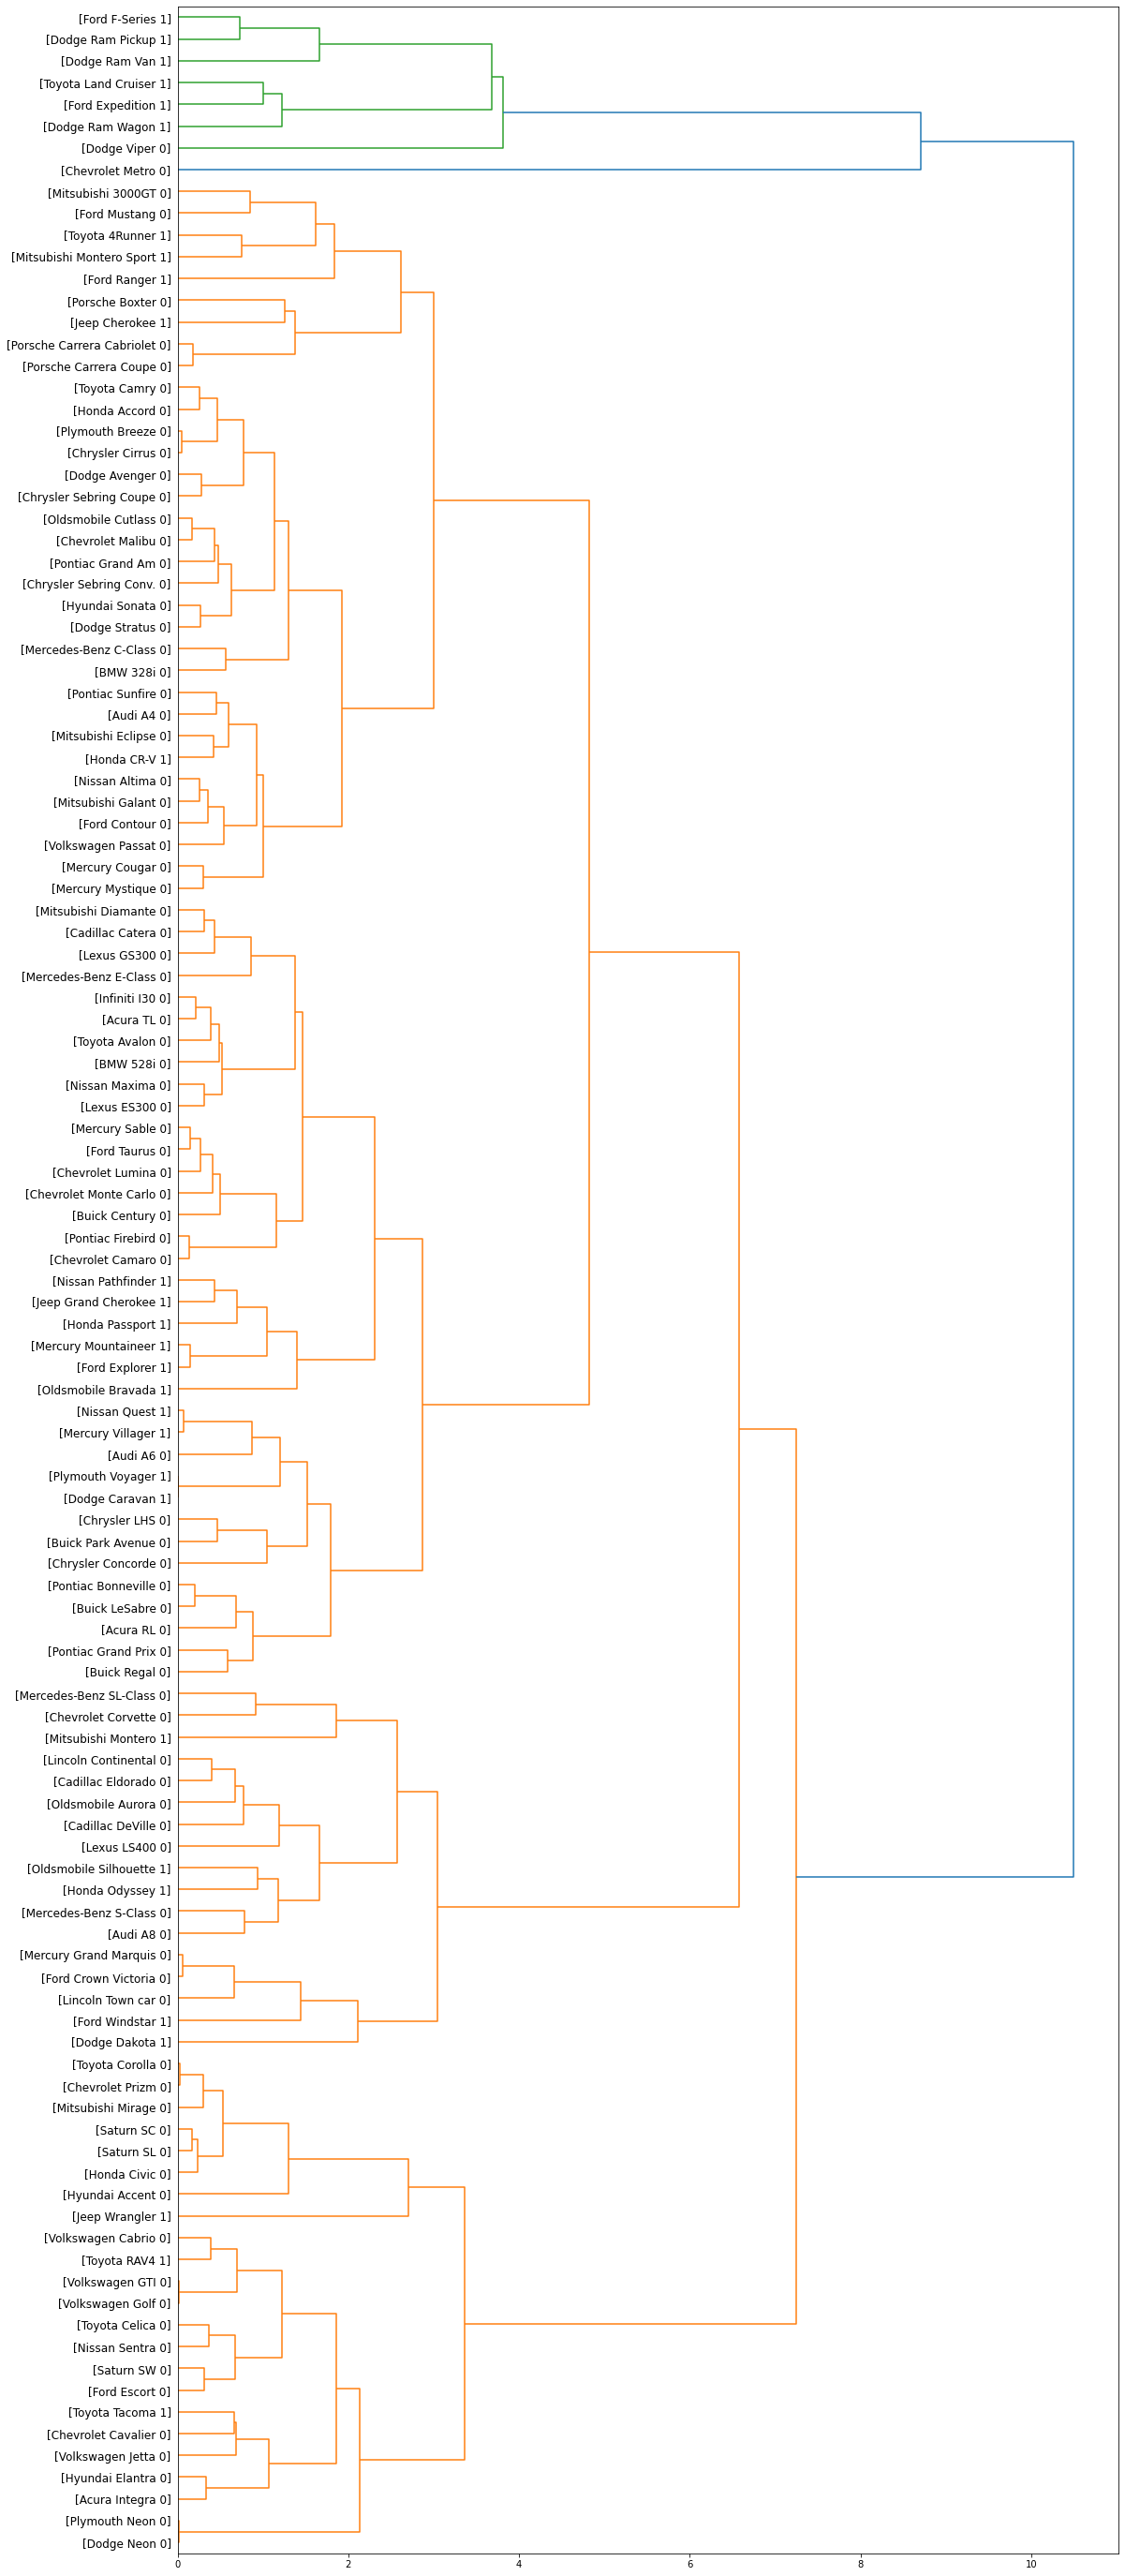

In [29]:
from scipy.cluster import hierarchy 
import pylab

Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (data['manufact'][id], data['model'][id], int(float(data['type'][id])) )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

##**DBSCAN**
DBSCAN = Density Based Spatial Clustering of Applications with Noise

*NOTE*: not from IBM AI Engineering Lab, from [here](https://www.reneshbedre.com/blog/dbscan-python.html)

**Data**

In [31]:
data = pd.read_csv("https://reneshbedre.github.io/assets/posts/tsne/tsne_scores.csv")
data.head()

,t-SNE-1,t-SNE-2
0,10.846841,-16.712580
1,24.794334,-16.775398
2,2.953309,13.379048
3,27.262146,-31.886690
4,-23.015728,64.468376


**DBSCAN Clustering**

In [33]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps = 2.5, min_samples = 4).fit(data)

from collections import Counter
Counter(clusters.labels_)



Counter({0: 834,
         1: 1501,
         2: 703,
         3: 285,
         4: 145,
         5: 245,
         6: 232,
         7: 283,
         8: 11,
         9: 11,
         -1: 34,
         10: 5,
         11: 13,
         12: 46,
         22: 4,
         13: 6,
         14: 10,
         15: 8,
         16: 4,
         17: 8,
         18: 5,
         19: 5,
         20: 4,
         21: 4})

**Visualization**

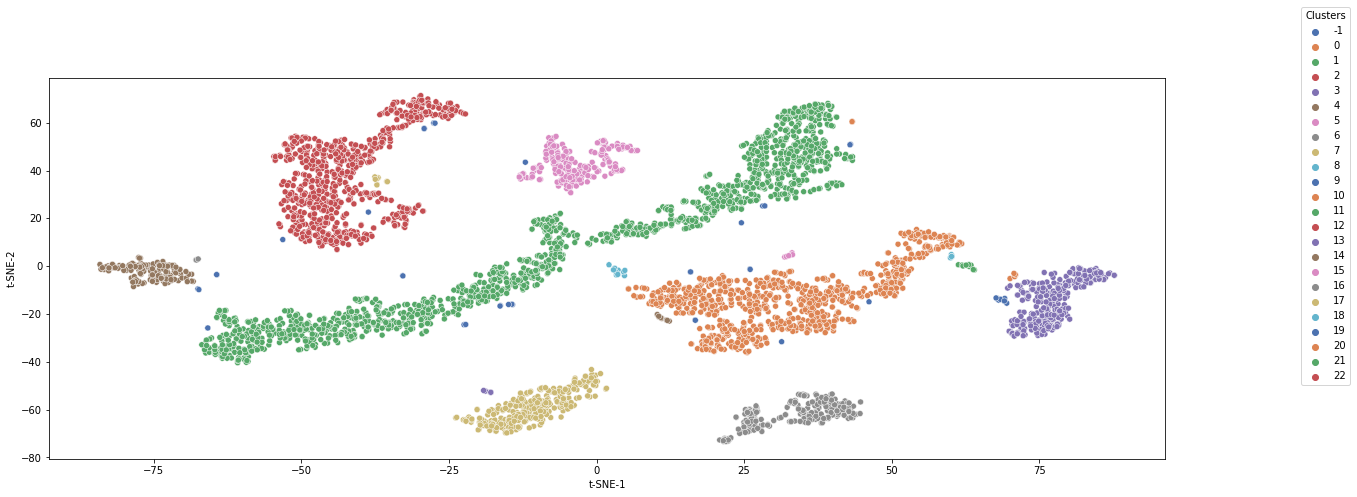

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,7))

p = sns.scatterplot(data = data, x = "t-SNE-1", y = "t-SNE-2", hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.2), title = 'Clusters')
plt.show()